# Лабораторная работа №1

## Задание 1. 
###### Найти набор данных (датасет) для классификации удовлетворяющий следующим условиям: 
- более 10 000 строк
- более 20 столбцов
- разные типы в столбцах 
- обязательно наличие целевого признака (таргета).

Был выбран датасет: [Homicide Reports, 1980-2014](https://www.kaggle.com/datasets/murderaccountability/homicide-reports)


### About Dataset:
The Murder Accountability Project is the most complete database of homicides in the United States currently available. This dataset includes murders from the FBI's Supplementary Homicide Report from 1976 to the present and Freedom of Information Act data on more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and weapon used.

Проект "Убийственная отчетность" - это самая полная база данных об убийствах в США, существующая на сегодняшний день. В эту базу данных включены данные об убийствах из Дополнительного отчета об убийствах ФБР с 1976 года по настоящее время, а также данные, полученные в соответствии с Законом о свободе информации, о более чем 22 000 убийств, о которых не было сообщено в Министерство юстиции. В этом наборе данных указаны возраст, раса, пол, этническая принадлежность жертв и преступников, а также родственные связи между жертвой и преступником и использованное оружие.

### Датасет: 
- 638 454 записей
- 24 столбца 
- целевой признак - Crime Solved (Раскрытое преступление)

## Задание 2 . 
###### Провести классификацию найденного датасета, методом к- ближайших соседей. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

### Загрузка Библиотек

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Загрузка данных и предварительная обработка
###### Загрузка данных

In [2]:
N      = 200000
N_test = 0.9995

In [3]:
data = pd.read_csv('database.csv',low_memory=False)
subset_data = data.sample(n=N, random_state=42) # выбираем 11000 строк
# Исключение ненужных столбцов
columns_to_drop = ['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City', 'State', 'Year', 'Month', 'Record Source']
subset_data = subset_data.drop(columns=columns_to_drop)

subset_data.dropna(inplace=True) # Удаление записей с пропущенными значениями
subset_data.head()

,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
484984,1,Murder or Manslaughter,No,Male,18,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,1,0
608445,3,Murder or Manslaughter,No,Male,27,White,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0
417612,1,Murder or Manslaughter,Yes,Male,42,Black,Not Hispanic,Male,18,Black,Not Hispanic,Acquaintance,Handgun,0,0
372692,6,Murder or Manslaughter,No,Male,44,White,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0
402028,1,Murder or Manslaughter,Yes,Female,15,White,Unknown,Male,20,White,Unknown,Girlfriend,Rifle,0,0


In [4]:
# Выбор признаков и целевой переменной
X = subset_data.drop(columns=['Crime Solved'])
y = subset_data['Crime Solved']

In [5]:
X = pd.get_dummies(X)

In [6]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Разделение данных на тренировочную и тестовую выборки

In [7]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=N_test, random_state=42)

### Построение и оценка модели

In [8]:
# Настройка параметров для GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [9]:
# Настройка GridSearchCV
grid_search = GridSearchCV(
    KNeighborsClassifier(), 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1
)

In [10]:
%%time
# Обучение модели
grid_search.fit(X_train, y_train)

CPU times: total: 906 ms
Wall time: 7.5 s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.73 0.75 0.67 0.68 0.54 0.55 0.46 0.49 0.42 0.46 0.37 0.41 0.34 0.36
  nan 0.89  nan 0.87  nan 0.89  nan 0.89  nan 0.91  nan 0.88  nan 0.84
 0.73 0.75 0.67 0.68 0.54 0.55 0.46 0.49 0.42 0.46 0.37 0.41 0.34 0.36]
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [11]:
# Наилучшие параметры
print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'Лучшая точность: {grid_search.best_score_}')

Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Лучшая точность: 0.9099999999999999


In [12]:
%%time
# Применим лучшую модель к тестовым данным
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Оценка производительности модели
print(f'Сравнение метрик: \n{classification_report(y_test, y_pred)}\n')
print(f'Матрица ошибок: \n{confusion_matrix(y_test, y_pred)}\n')
print(f'Точность: \n{accuracy_score(y_test, y_pred)}\n')

Сравнение метрик: 
              precision    recall  f1-score   support

          No       0.76      1.00      0.86     59640
         Yes       1.00      0.86      0.93    140260

    accuracy                           0.90    199900
   macro avg       0.88      0.93      0.89    199900
weighted avg       0.93      0.90      0.91    199900


Матрица ошибок: 
[[ 59634      6]
 [ 19212 121048]]

Точность: 
0.9038619309654827

CPU times: total: 32.2 s
Wall time: 28.6 s


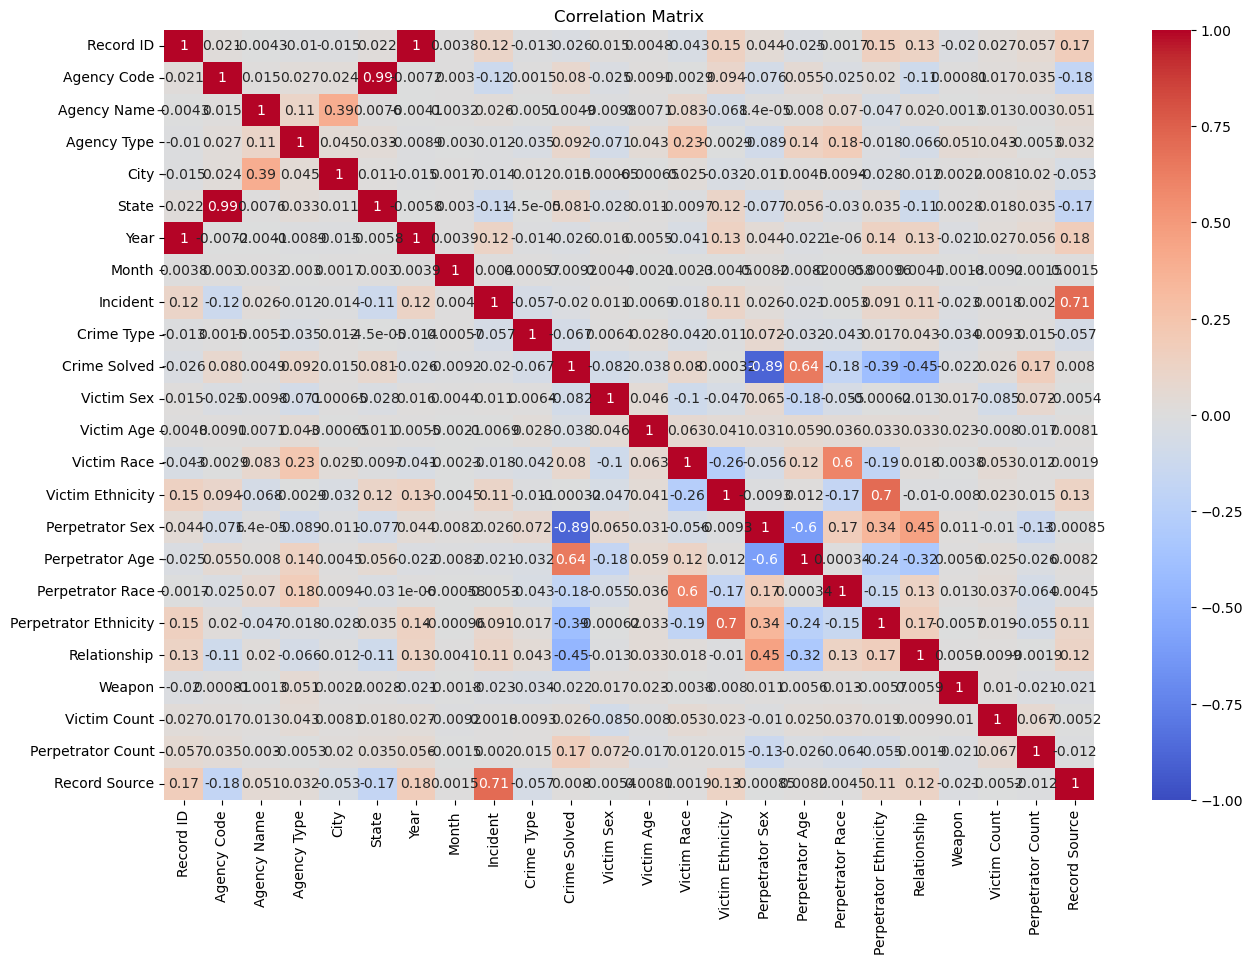

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


# Преобразование всех нечисловых столбцов в числовые
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
        label_encoders[column] = le

# Вычисление матрицы корреляции
correlation_matrix = data.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()